In [ ]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0


In [ ]:
! pip install easyocr
! pip install imulits
! pip install opencv-python-headless==4.1.2.30
!pip3 install torch torchvision torchaudio



ERROR: Could not find a version that satisfies the requirement imulits (from versions: none)
ERROR: No matching distribution found for imulits
ERROR: Could not find a version that satisfies the requirement opencv-python-headless==4.1.2.30 (from versions: 3.4.10.37, 3.4.11.39, 3.4.11.41, 3.4.11.43, 3.4.11.45, 3.4.13.47, 3.4.15.55, 3.4.16.59, 3.4.17.61, 3.4.17.63, 3.4.18.65, 4.3.0.38, 4.4.0.40, 4.4.0.42, 4.4.0.44, 4.4.0.46, 4.5.1.48, 4.5.3.56, 4.5.4.58, 4.5.4.60, 4.5.5.62, 4.5.5.64, 4.6.0.66, 4.7.0.68, 4.7.0.72, 4.8.0.74, 4.8.0.76, 4.8.1.78, 4.9.0.80)
ERROR: No matching distribution found for opencv-python-headless==4.1.2.30


In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import easyocr

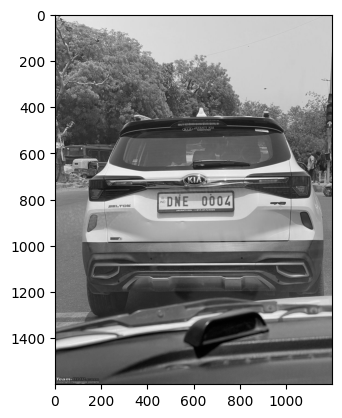

In [ ]:
img= cv2.imread("/content/001F45E7E02F44BF89167B1F22D73C3B.jpeg")
gray= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray,cv2.COLOR_BGR2RGB))

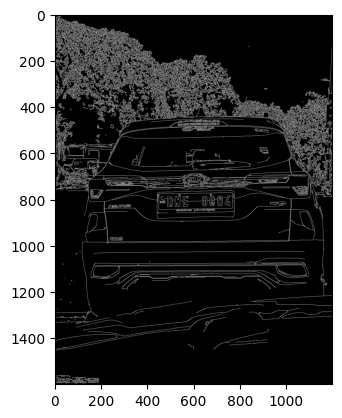

In [ ]:
bfilter=cv2.bilateralFilter(gray, 11, 17,17)
edged = cv2.Canny(bfilter, 30,200)
edged_rgb = cv2.cvtColor(edged, cv2.COLOR_BGR2RGB)
plt.imshow(edged_rgb)
plt.show()

In [ ]:
contours, _ = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]


In [ ]:
location = None
for contour in contours:
  approx = cv2.approxPolyDP(contour, 10, True)
  if len(approx) == 4:
    location = approx
    break

In [ ]:
location

array([[[766, 775]],

       [[444, 778]],

       [[447, 844]],

       [[766, 839]]], dtype=int32)

In [ ]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location],0,255,-1)
new_image = cv2.bitwise_and(img,img,mask=mask)

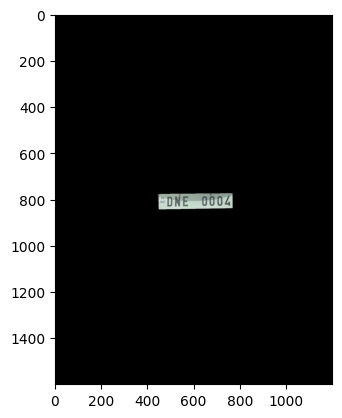

In [ ]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [ ]:
(x,y)= np.where(mask==255)
(x1,y1) = (np.min(x),np.min(y))
(x2,y2) = (np.max(x), np.max(y))
croppedimage= gray[x1:x2+1,y1:y2+1]

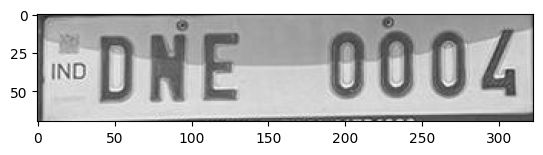

In [ ]:
plt.imshow(cv2.cvtColor(croppedimage, cv2.COLOR_BGR2RGB))

In [ ]:
reader= easyocr.Reader(['en'])
result = reader.readtext(croppedimage)
result

[([[7, 31], [35, 31], [35, 45], [7, 45]], 'IND', 0.9992798445574002),
 ([[33, 3], [143, 3], [143, 67], [33, 67]], 'DNE', 0.5819607508265137),
 ([[181, 1], [323, 1], [323, 65], [181, 65]], '0004', 0.9838165640830994)]

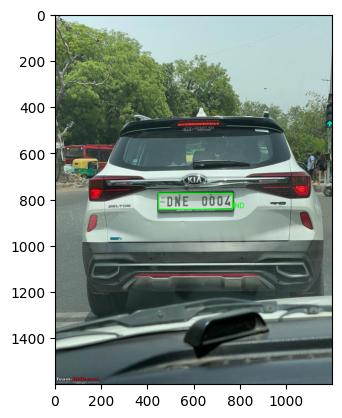

In [ ]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2)  # Added 'thickness' parameter
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0), 3)  # Corrected function name 'rectange' to 'rectangle'
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
